## Adding required libraries

In [ ]:
import gradio as gr
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab/Golf.csv', low_memory=False)

## EDA

In [ ]:
# Understanding the spread of data
df.shape

(36864, 37)

In [ ]:
# Viewing the data
df.head()

,Player_initial_last,tournament id,player id,hole_par,strokes,hole_DKP,hole_FDP,hole_SDP,streak_DKP,streak_FDP,...,purse,season,no_cut,Finish,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total
0,A. Ancer,401353224,9261,288,289,60.0,51.1,56,3,7.6,...,12.0,2022,0,T32,0.20,-0.13,-0.08,0.86,0.65,0.85
1,A. Hadwin,401353224,5548,288,286,72.5,61.5,61,8,13.0,...,12.0,2022,0,T18,0.36,0.75,0.31,0.18,1.24,1.60
2,A. Lahiri,401353224,4989,144,147,21.5,17.4,27,0,0.0,...,12.0,2022,0,CUT,-0.56,0.74,-1.09,0.37,0.02,-0.54
3,A. Long,401353224,6015,144,151,20.5,13.6,17,0,0.4,...,12.0,2022,0,CUT,-1.46,-1.86,-0.02,0.80,-1.08,-2.54
4,A. Noren,401353224,3832,144,148,23.5,18.1,23,0,1.2,...,12.0,2022,0,CUT,0.53,-0.36,-1.39,0.19,-1.56,-1.04


In [ ]:
# Checking the structre of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36864 entries, 0 to 36863
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player_initial_last  36864 non-null  object 
 1   tournament id        36864 non-null  int64  
 2   player id            36864 non-null  int64  
 3   hole_par             36864 non-null  int64  
 4   strokes              36864 non-null  int64  
 5   hole_DKP             36864 non-null  float64
 6   hole_FDP             36864 non-null  float64
 7   hole_SDP             36864 non-null  int64  
 8   streak_DKP           36864 non-null  int64  
 9   streak_FDP           36864 non-null  float64
 10  streak_SDP           36864 non-null  int64  
 11  n_rounds             36864 non-null  int64  
 12  made_cut             36864 non-null  int64  
 13  pos                  21317 non-null  float64
 14  finish_DKP           36864 non-null  int64  
 15  finish_FDP           36864 non-null 

In [ ]:
# Checking if there are any missing values in the dataset
print(df.isnull().sum())

Player_initial_last        0
tournament id              0
player id                  0
hole_par                   0
strokes                    0
hole_DKP                   0
hole_FDP                   0
hole_SDP                   0
streak_DKP                 0
streak_FDP                 0
streak_SDP                 0
n_rounds                   0
made_cut                   0
pos                    15547
finish_DKP                 0
finish_FDP                 0
finish_SDP                 0
total_DKP                  0
total_FDP                  0
total_SDP                  0
player                     0
Unnamed: 2             36864
Unnamed: 3             36864
Unnamed: 4             36864
tournament name            0
course                     0
date                       0
purse                      0
season                     0
no_cut                     0
Finish                  7683
sg_putt                 7684
sg_arg                  7684
sg_app                  7684
sg_ott        

In [ ]:
# Counting the number of unique records in each column to get information about number of tournaments, players, seasons, etc
print(df.nunique())

Player_initial_last     497
tournament id           333
player id               499
hole_par                 20
strokes                 155
hole_DKP                306
hole_FDP               1196
hole_SDP                111
streak_DKP               17
streak_FDP              190
streak_SDP               20
n_rounds                  4
made_cut                  2
pos                      89
finish_DKP               17
finish_FDP               16
finish_SDP               14
total_DKP               338
total_FDP              1692
total_SDP               142
player                  499
Unnamed: 2                0
Unnamed: 3                0
Unnamed: 4                0
tournament name          80
course                   92
date                    320
purse                    64
season                    8
no_cut                    2
Finish                  175
sg_putt                 786
sg_arg                  594
sg_app                  807
sg_ott                  631
sg_t2g              

## Data Cleaning

In [ ]:
# Remove unwanted columns
df.drop(columns= ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

# Step 1: Replace string 'Nan' with actual np.nan
df.replace('Nan', np.nan, inplace=True)

# Step 2: Define all columns except 'pos'
cols_to_check = df.columns.difference(['pos'])

# Step 3: Drop rows with NA in any column *except* 'pos'
df.dropna(subset=cols_to_check, inplace=True)

## Cluster Analysis
### Problem Statement 2:

How can we categorize PGA players based on their playing style and strengths using strokes gained metrics?

Why it's valuable: Coaches and fans can better understand player personas: e.g., aggressive drivers vs tactical putters.

Techniques:


1. K-Means / DBSCAN clustering
2. PCA for dimensionality reduction
3. Visualizations of clusters (e.g., radar charts)

### Data Filtering and Scaling

In [ ]:
# Segregating the columns for analysis
features = ['sg_ott', 'sg_app', 'sg_arg', 'sg_putt']
df_cluster = df[features].dropna()

# Keepign player names for labeling
player_names = df.loc[df_cluster.index, 'player']

# Standardize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cluster)

### K-means Clustering

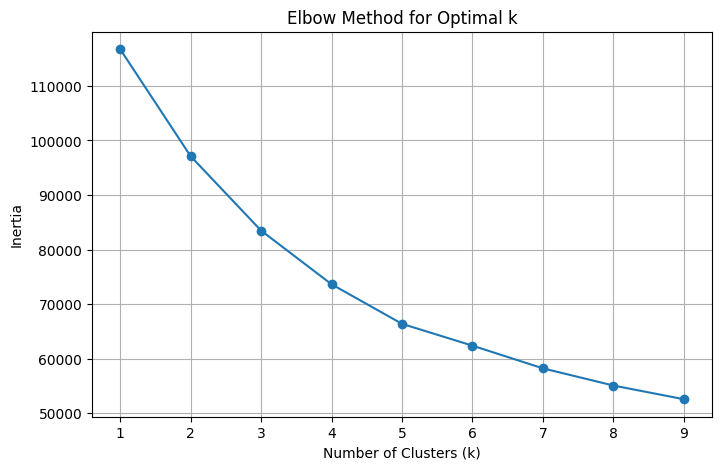

In [ ]:
# Creating K range to see where the elbow for the data lies
inertia = []
K_range = range(1, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
# Defining the number of clusters to be created based on elbow point
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(scaled_features)

### PCA Analysis and Plotting

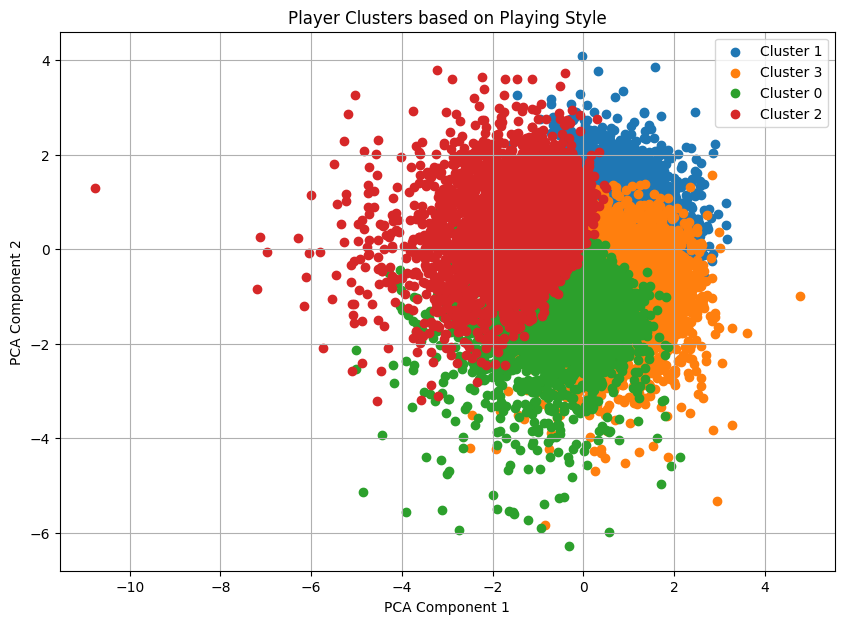

In [ ]:
# Defining PCA for plotting the clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)
df_cluster['pca1'] = components[:, 0]
df_cluster['pca2'] = components[:, 1]

plt.figure(figsize=(10, 7))
for cluster in df_cluster['cluster'].unique():
    plt.scatter(
        df_cluster[df_cluster['cluster'] == cluster]['pca1'],
        df_cluster[df_cluster['cluster'] == cluster]['pca2'],
        label=f'Cluster {cluster}'
    )

plt.title('Player Clusters based on Playing Style')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

### Group Summary

In [ ]:
# Add player names back
df_cluster['Player'] = player_names.values

# Mean profile of each cluster to understand the broad view for each cluster
cluster_profiles = df_cluster.groupby('cluster')[features].mean()
cluster_profiles

,sg_ott,sg_app,sg_arg,sg_putt
cluster,,,,
0,0.040122,-0.848242,-0.940119,0.093886
1,0.235615,0.435602,0.188602,0.510201
2,-1.039813,-0.834956,0.347394,0.003858
3,0.220380,0.193559,-0.016908,-1.457567


### Widget using Gradio

In [ ]:
# Create a cluster name mapping for display
cluster_names = {
    0: 'Ball Strikers',
    1: 'Putting Specialists',
    2: 'Short Game Experts',
    3: 'Scrappy All-Rounders'
}

# Map cluster number to cluster name
df_cluster['cluster_name'] = df_cluster['cluster'].map(cluster_names)

In [ ]:
# Ensure no duplicates in df_cluster: one row per player
df_cluster_clean = (
    df_cluster
    .groupby('Player')
    .first()          # or .agg(...) if you'd prefer to define aggregation
    .reset_index()
)

# Now merge
df = df.merge(
    df_cluster_clean[['Player', 'cluster', 'cluster_name']],
    left_on='player',
    right_on='Player',
    how='left'
)

# Drop redundant 'Player' column that came from df_cluster
df.drop(columns=['Player'], inplace=True)


In [ ]:
# Function to generate radar + time series + summary
def player_dashboard(selected_player):
    player_data = df[df['player'] == selected_player]
    cluster_num = player_data['cluster'].iloc[0]
    cluster_name = player_data['cluster_name'].iloc[0]

    # Radar chart: player vs cluster avg
    player_means = player_data[features].mean()
    cluster_means = cluster_profiles.loc[cluster_num]

    radar_fig = go.Figure()
    radar_fig.add_trace(go.Scatterpolar(
        r=player_means.values,
        theta=features,
        fill='toself',
        name=selected_player
    ))
    radar_fig.add_trace(go.Scatterpolar(
        r=cluster_means.values,
        theta=features,
        fill='toself',
        name=f'Cluster Avg ({cluster_name})'
    ))
    radar_fig.update_layout(
        polar=dict(radialaxis=dict(visible=True)),
        showlegend=True,
        title="Strokes Gained Profile"
    )

    # Time series: sg_app and sg_putt over seasons
    ts_fig = go.Figure()
    ts_fig.add_trace(go.Scatter(
        x=player_data['season'],
        y=player_data['sg_app'],
        mode='lines+markers',
        name='SG App'
    ))
    ts_fig.add_trace(go.Scatter(
        x=player_data['season'],
        y=player_data['sg_putt'],
        mode='lines+markers',
        name='SG Putt'
    ))
    ts_fig.update_layout(
        title="Strokes Gained Over Seasons",
        xaxis_title="Season",
        yaxis_title="Strokes Gained",
        xaxis=dict(type='category')
    )

        # Summary info
    match_count = len(player_data)
    season_count = player_data['season'].nunique()

    # Clean pos column for win calculation
    pos_cleaned = player_data['pos'].astype(str).str.upper().str.strip()

    if 'tournament' in player_data.columns:
        num_tournaments = player_data['tournament name'].nunique()
        # Unique tournaments with win (1, 1.0, T1 etc.)
        win_tourneys_numeric = player_data.loc[player_data['pos'] == 1.0, 'tournament name'].unique()
        win_tourneys_text = player_data.loc[pos_cleaned == '1', 'tournament name'].unique()
        win_tourneys_t1 = player_data.loc[pos_cleaned == 'T1', 'tournament name'].unique()
        num_wins = len(set(win_tourneys_numeric) | set(win_tourneys_text) | set(win_tourneys_t1))
    else:
        num_tournaments = match_count  # fallback
        num_wins = (player_data['pos'] == 1.0).sum() + pos_cleaned.isin(['1', 'T1']).sum()

    summary = f"""
    **Player Name:** {selected_player}\n
    **Cluster:** {cluster_num}\n
    **Cluster Name:** {cluster_name}\n
    **Tournaments Played:** {num_tournaments}\n
    **Seasons Played:** {season_count}\n
    **Number of Wins:** {num_wins}
    """


    return radar_fig, ts_fig, summary

In [ ]:
# Gradio interface
player_list = df['player'].dropna().unique().tolist()

with gr.Blocks() as demo:
    gr.Markdown("# 🏌️ PGA Player Dashboard")
    with gr.Row():
      with gr.Column(scale=1):
        player_dropdown = gr.Dropdown(choices=player_list, label="Select Player")
        summary_card = gr.Markdown()

      with gr.Column(scale=2):
        radar_plot = gr.Plot(label="Radar Chart")
        ts_plot = gr.Plot(label="Time Series Chart")


    player_dropdown.change(fn=player_dashboard, inputs=[player_dropdown],
                           outputs=[radar_plot, ts_plot, summary_card])

demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7cad3bbab1c2c55421.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
